In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit

In [2]:
df= pd.read_csv('/Users/macbook/Documents/cars_bought_UK_2021.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         3316 non-null   object
 1   price         3316 non-null   int64 
 2   transmission  3316 non-null   object
 3   mileage       3316 non-null   int64 
 4   fuelType      3316 non-null   object
 5   tax           3316 non-null   int64 
 6   mpg           3316 non-null   object
 7   engineSize    3316 non-null   object
 8   Make          3316 non-null   object
dtypes: int64(3), object(6)
memory usage: 233.3+ KB


In [4]:
df.head(5)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,5 Series,42995,Automatic,7500,Hybrid,135,"156,9",2,BMW
1,Q5,48990,Semi-Auto,5000,Hybrid,135,"117,7",2,audi
2,2 Series,34975,Semi-Auto,5,Diesel,145,"48,7",2,BMW
3,Q5,35500,Semi-Auto,3500,Diesel,145,"38,2",2,audi
4,TT,28800,Semi-Auto,241,Petrol,145,"40,9",2,audi


In [5]:
#check duplicated
df.duplicated().sum()

118

In [6]:
df = df.drop_duplicates()

In [7]:
df.reset_index(drop=True, inplace=True)

### ¿Cuáles son las marcas de coches que generan más ingresos?

In [8]:
df.groupby(['Make'])['price'].sum().sort_values()


Make
toyota      2925221
Hyundai     3140578
Ford        5247552
skoda       6035019
vw         23720628
audi       24910400
BMW        25559032
Name: price, dtype: int64

In [35]:
df.groupby(['Make'])['price'].mean().sort_values()


Make
Hyundai    19752.062893
Ford       20823.619048
skoda      22688.041353
toyota     23033.236220
vw         24130.852492
BMW        35400.321330
audi       36154.426705
Name: price, dtype: float64

### ¿Cuáles son los coches que generan más ingresos (tanto por coche como en conjunto)?

In [21]:
df.groupby(['Make','model'])['price'].sum().sort_values().nlargest(50)


Make     model     
vw        Golf         6017684
BMW       3 Series     5090176
audi      Q3           4390446
          Q5           3928925
vw        T-Roc        3473467
          Tiguan       3256072
audi      A4           3179214
BMW       2 Series     2977616
vw        Polo         2443856
audi      A5           2322942
BMW       5 Series     2153982
          4 Series     2117323
audi      Q7           2110752
          A1           1962374
vw        T-Cross      1922438
audi      Q2           1642616
BMW       X2           1635157
vw        Passat       1581572
BMW       1 Series     1570340
Ford      Fiesta       1403500
BMW       Z4           1351522
skoda     Kodiaq       1337033
audi      A3           1235005
BMW       X3           1180176
Ford      Focus        1164761
skoda     Superb       1155772
vw        Touareg      1139315
BMW       M4           1056439
          X1           1049769
          X5           1027685
vw        Up           1005626
BMW       X7       

In [41]:
df.groupby(['Make','model'])['price'].mean().sort_values().nlargest(50)


Make     model           
audi      R8                 138965.000000
          RS6                103621.750000
BMW       X7                  71569.500000
audi      RS4                 69752.666667
          Q8                  69206.400000
BMW       8 Series            64867.750000
audi      Q7                  63962.181818
vw        California          61995.000000
BMW       X6                  58094.375000
          X5                  57093.611111
audi      SQ5                 56450.000000
          A8                  55627.500000
BMW       7 Series            54743.000000
          M4                  50306.619048
toyota    Land Cruiser        50081.375000
vw        Touareg             49535.434783
          Caravelle           47968.300000
BMW       X4                  46571.411765
audi      S4                  45388.000000
BMW       M2                  45247.250000
audi      A7                  44974.000000
          Q5                  43175.000000
toyota    PROACE VERSO      

In [25]:
df.groupby(['Make','model'])['model'].count().sort_values().nlargest(100)


Make    model                 
vw       Golf                     241
         Polo                     151
BMW      3 Series                 149
audi     Q3                       133
vw       T-Roc                    130
                                 ... 
Ford     Tourneo Connect            1
         Grand Tourneo Connect      1
         Ka+                        1
toyota   Camry                      1
audi     SQ5                        1
Name: model, Length: 92, dtype: int64

In [43]:
df.groupby(['model','transmission'])['model'].count().sort_values().nlargest(50)


model      transmission
 3 Series  Semi-Auto       115
 Polo      Manual          110
 Golf      Semi-Auto       105
           Manual          104
 Up        Manual           91
 2 Series  Semi-Auto        78
 Fiesta    Manual           78
 T-Roc     Manual           74
 Q5        Semi-Auto        67
 Q3        Semi-Auto        64
 4 Series  Semi-Auto        63
 5 Series  Semi-Auto        60
 A5        Semi-Auto        59
 T-Cross   Manual           59
 A4        Semi-Auto        55
 Tiguan    Semi-Auto        54
 A1        Semi-Auto        50
 I10       Manual           48
 T-Roc     Semi-Auto        46
 Puma      Manual           45
 Tiguan    Manual           44
 X2        Semi-Auto        41
 Kodiaq    Automatic        38
 Focus     Manual           36
 1 Series  Semi-Auto        36
 Passat    Semi-Auto        36
 Superb    Semi-Auto        36
 Q3        Manual           36
 Z4        Semi-Auto        35
 Polo      Semi-Auto        34
 Q3        Automatic        33
 Golf      Auto

### ¿Hay dependencias entre el tamaño del motor y el precio de venta?

In [11]:
df['engineSize'] = df['engineSize'].str.replace(',','.')


In [13]:
df['engineSize']=pd.to_numeric(df['engineSize'],errors='coerce')

In [28]:
df['mpg'] = df['mpg'].str.replace(',','.')


In [29]:
df['mpg']=pd.to_numeric(df['mpg'],errors='coerce')

<AxesSubplot:xlabel='engineSize', ylabel='price'>

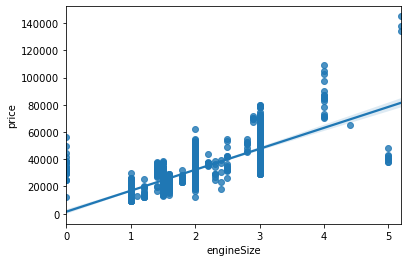

In [17]:
sns.regplot(data=df,x=df['engineSize'],y=df['price'])

<AxesSubplot:>

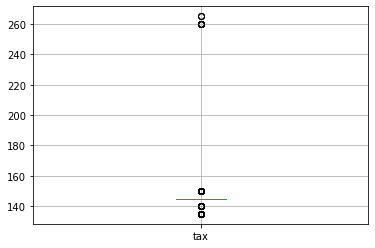

In [19]:
df.boxplot('tax')

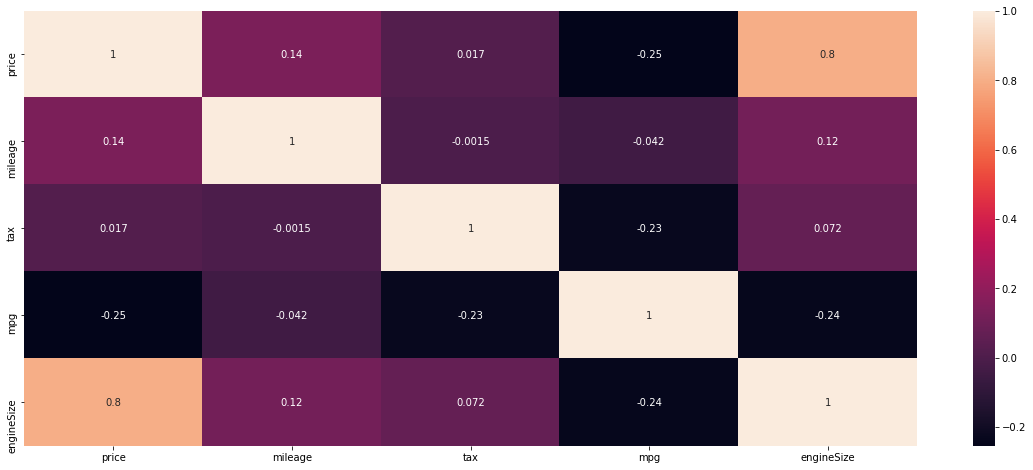

In [34]:
corre_matrix=df.corr() #only for numerical filed
plt.figure(figsize=(20,8))
sns.heatmap(corre_matrix, annot=True);

In [38]:
df.to_csv('/Users/macbook/Documents/cars.csv', index = False)